# 03. Градиентный спуск, линейная регрессия

In [ ]:
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(11.7,8.27)})

import os # для обработки пути к данным как на Unix-системах, так и на Windows

## Fake dataset creation

In [ ]:
X = np.random.gumbel(50, 10, 1000).reshape(-1,1) # генерируем фичи
y = X * 70000 # генерируем таргет данные
y = y + np.random.normal(0, 800000, (1000, 1)) # добавляем шум

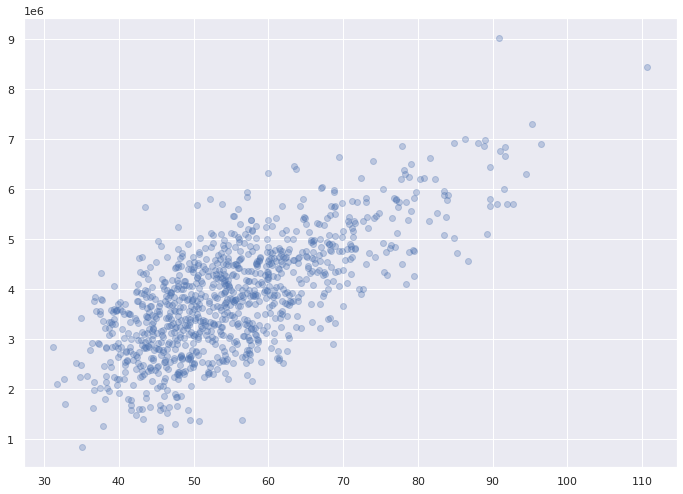

In [ ]:
plt.plot(X, y, 'o', alpha=0.3)

## Perceptron function

$$y = (\sum_{i=0}^{n}{x_i * w_i}) + b$$

или

$$y = x_1 * w_1 + x_2 * w_2 + ... + x_n * w_n + b$$

In [ ]:
def perceptron(x, w, b):
  """Forward Run for one feature"""
  return x * w + b

### Three dots example

In [ ]:
X_fake = np.linspace(0, 100, 100)

def update(w=1.0, b=0.0):
    """Remove old lines from plot and plot new one"""
    plt.plot(X_fake, perceptron(X_fake, w, b), color='C0')
    plt.plot([1, 2, 3], [1, 2, 3], 'x', color='red', linewidth=20, markersize=12)
    plt.xlim(0, 4)
    plt.ylim(0, 4)

widgets.interact(update, w=(-3, 3, 0.5), b=(-3, 3, 0.5))

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-3.0, step=0.5), FloatSlider(value=…

<function __main__.update>

In [ ]:
X_fake = np.linspace(0, 100, 100)

def update(w=1.0, b=0.0):
    """Remove old lines from plot and plot new one"""
    plt.plot(X_fake, perceptron(X_fake, w, b), color='C0')
    plt.plot(X, y, 'bo', linewidth=20, alpha=0.3)
    # plt.xlim(0, 4)
    # plt.ylim(0, 4)

widgets.interact(update, w=(0, 100000, 10000), b=(0, 100000, 10000))

interactive(children=(IntSlider(value=1, description='w', max=100000, step=10000), IntSlider(value=0, descript…

<function __main__.update>

## Loss Function

Mean Squared Error (MSE):

$$L(y, \hat{y}) = \frac{1}{m} \sum_{i=0}^{m}{(y_i - \hat{y_i})^2}$$

In [ ]:
def mse(y, y_pred):
  """Mean Squared Error"""
  return np.mean(np.square(y_pred - y))

In [ ]:
X_three = np.array([1, 2, 3])
y_three = np.array([1, 2, 3])
mse(y_three, perceptron(X_three, 1.5, 0))

1.1666666666666667

In [ ]:
X_linespace = np.linspace(0, 100, 100)
w_possible_values = np.linspace(-5, 5, 30)
X_three_dots = np.array([1, 2, 3])
y_three_dots = np.array([1, 2, 3])

def update(w=1.0, b=0.0):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # prediction plot
    ax1.plot(X_fake, perceptron(X_fake, w, b), color='C0')
    ax1.plot(X_three_dots, y_three_dots, 'x', color='red', linewidth=20, markersize=12)
    ax1.set_xlim(0, 4)
    ax1.set_ylim(0, 4)

    # loss plot
    ax2.plot(w_possible_values, [mse(y_three_dots, perceptron(X_three_dots, w, b)) for w in w_possible_values])
    ax2.plot(w, mse(y_three_dots, perceptron(X_three_dots, w, b)), 'x', color='red', markersize=12)
    ax2.set_xlim(-1, 3)
    ax2.set_ylim(0, 10)

widgets.interact(update, w=(-3, 3, 0.5))

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-3.0, step=0.5), FloatSlider(value=…

<function __main__.update>

In [ ]:
X_linespace = np.linspace(0, 100, 100)
w_possible_values = np.linspace(0, 100000, 10000)
X_three_dots = np.array([1, 2, 3])
y_three_dots = np.array([1, 2, 3])

def update(w=1.0, b=0.0):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # prediction plot
    ax1.plot(X_fake, perceptron(X_fake, w, b), color='C0')
    ax1.plot(X, y, 'x', color='red', linewidth=20, markersize=12)
    # ax1.set_xlim(0, 4)
    # ax1.set_ylim(0, 4)

    # loss plot
    ax2.plot(w_possible_values, [mse(y, perceptron(X, w, b)) for w in w_possible_values])
    ax2.plot(w, mse(y, perceptron(X, w, b)), 'o', color='red', alpha=0.1)
    # ax2.set_xlim(-1, 3)
    # ax2.set_ylim(0, 10)

widgets.interact(update, w=(0, 100000, 10000))

interactive(children=(IntSlider(value=1, description='w', max=100000, step=10000), FloatSlider(value=0.0, desc…

<function __main__.update>

## Gradient Descent

In [ ]:
TRAIN_TEST_RATIO = 0.8 # доля экземпляров в тренировочном датасете по отношению к количеству всех экземпляров в исходном датасете

In [ ]:
train_number = round(X.shape[0] * TRAIN_TEST_RATIO) # количество экземпляров в тренировочном датасете

X_train = X[:train_number] # избегание ошибки с одномерным массивом
y_train = y[:train_number]

X_test = X[train_number:] # избегание ошибки с одномерным массивом
y_test = y[train_number:]

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (800, 1)
y_train.shape: (800, 1)
X_test.shape: (200, 1)
y_test.shape: (200, 1)


## Visualization

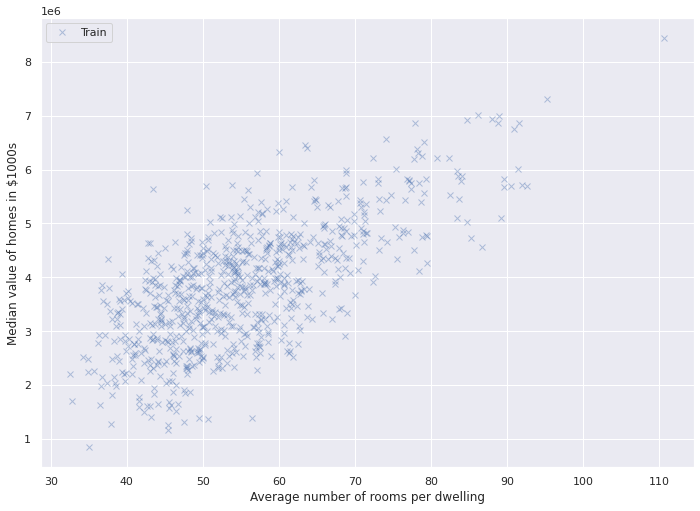

In [ ]:
plt.plot(X_train, y_train, 'bx', label="Train", alpha=0.4) # тренировочные данные крестиками
plt.xlabel("Average number of rooms per dwelling") # надпись по оси X
plt.ylabel("Median value of homes in $1000s") # надпись по оси Y
plt.legend() # отображение легенды
plt.show() # отображение графика

## Model

In [ ]:
class LinearRegression:

  def __init__(self, lr, n_epochs):
    self.lr = lr
    self.n_epochs = n_epochs

  def mse(self, y, y_pred):
    return np.sum(np.square(y - y_pred)) / y.shape[0]

  def loss_gradient_w(self, y_pred, y, x):
    return 2 * np.sum((y_pred - y) * x) / y.shape[0]

  def loss_gradient_b(self, y_pred, y, x):
    return 2 * np.sum(y_pred - y) / y.shape[0]

  def fit(self, X, y):
    self.w = 0
    self.b = 0
    for i in range(self.n_epochs):
      self.w = self.w - self.lr * loss_gradient_w(self.predict(X), y, X)
      self.b = self.b - self.lr * loss_gradient_b(self.predict(X), y)
      print(f"MSE: {mse(y, self.predict(X))}")

  def predict(self, X):
    return self.w * X + self.b

In [ ]:
model =

## Model evaluation

In [ ]:
X_train.shape

(800, 1)

In [ ]:
model = LinearRegression(10e-5, 20)
model.fit(X_train, y_train)

## Model result visualization

In [ ]:
plt.plot(X_train, y_train, 'bx', label='Train', alpha=0.4) # тренировочные данные крестиками
plt.plot(X_test, y_test, 'bo', label='Test', alpha=0.4) # тестовые данные кружочками

# параметр model.coef_ - веса модели (W)
# параметр model.intercept_ - свободный параметр модели (b)
xx = np.arange(30, 110).reshape(-1, 1) # числовой ряд
plt.plot(xx, model.predict(xx), 'r--') # график предсказаний модели
plt.xlabel("Average number of rooms per dwelling") # надпись по оси X
plt.ylabel("Median value of homes in $1000s") # надпись по оси Y
plt.legend() # отображение легенды
plt.show() # отображение графика

## Same with sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
plt.plot(X_train, y_train, 'bx', label='Train', alpha=0.4) # тренировочные данные крестиками
plt.plot(X_test, y_test, 'bo', label='Test', alpha=0.4) # тестовые данные кружочками

# параметр model.coef_ - веса модели (W)
# параметр model.intercept_ - свободный параметр модели (b)
xx = np.arange(30, 110).reshape(-1, 1) # числовой ряд
plt.plot(xx, model.predict(xx), 'r--') # график предсказаний модели
plt.legend()